#  Разведочный анализ данных. Исследование и визуализация данных.
## 1) Текстовое описание набора данных
В качестве набора данных будем использовать данные о людях больных диабетом https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
Датасет состоит из 11 колонок, где 11я - целевой признак, представляющий собой количественный показатель прогрессирования заболевания через год после исходного уровня.
Первые 10 колонок - числовые прогностические значения.
- age - возраст в годах
- sex - пол
- bmi - индекс массы тела
- bp - среднее кровяное давление
- s1 tc - общий холестерин в сыворотке крови
- s2 ldl - липопротеины низкой плотности
- s3 hdl - липопротеины высокой плотности
- s4 tch - общий холестерин / ЛПВП
- s5 ltg - потенциальный логарифм уровня триглицеридов в сыворотке
- s6 glu - уровень сахара в крови

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

In [2]:
diabets=load_diabetes()

In [3]:
type(diabets)

sklearn.utils._bunch.Bunch

In [4]:
data1 = pd.DataFrame(data= np.c_[diabets['data'], diabets['target']],
                     columns= diabets['feature_names'] + ['target'])

## 2) Характеристики датасета

In [5]:
data1

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

In [6]:
data1.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

## 3) Визуальное исследование датасета
### Диаграмма рассеяния

<AxesSubplot: xlabel='bmi', ylabel='bp'>

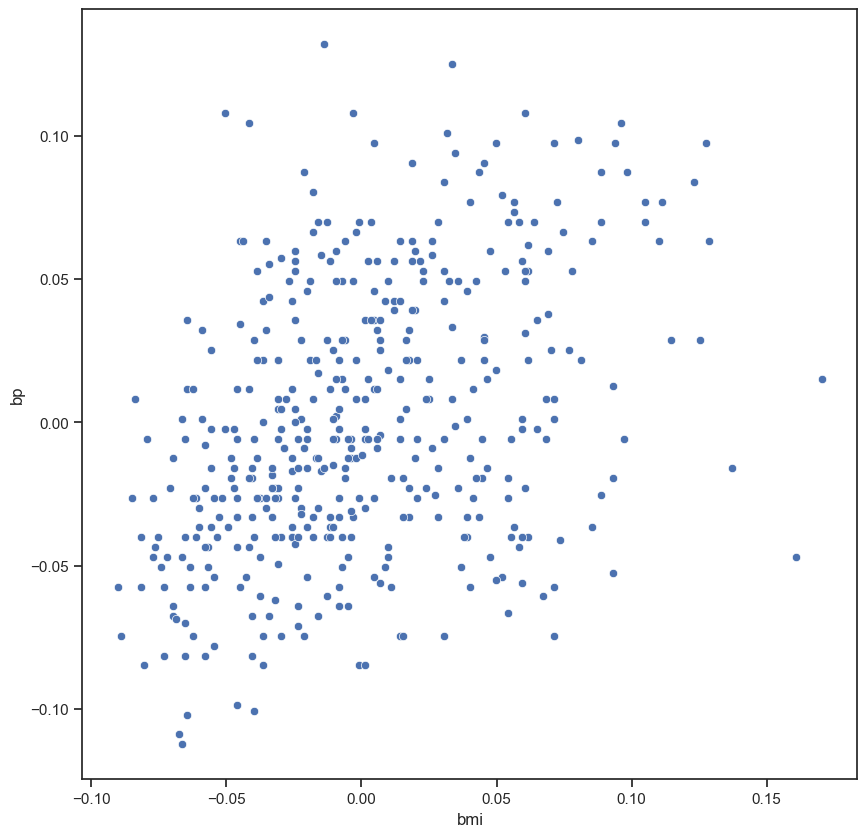

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='bmi', y='bp', data=data1)

<AxesSubplot: xlabel='bmi', ylabel='bp'>

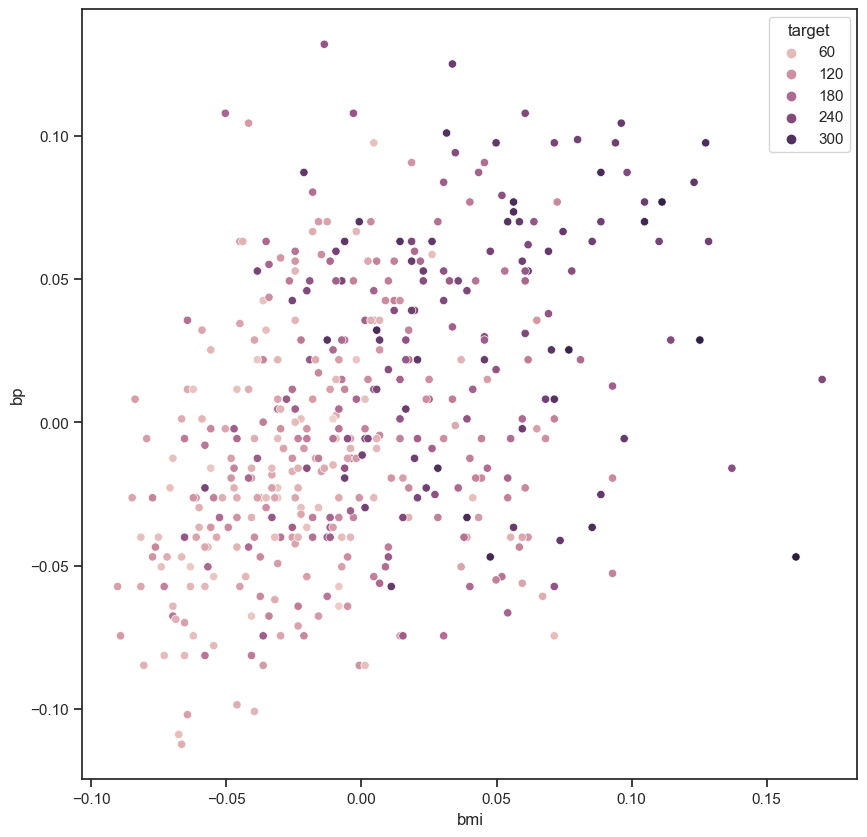

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='bmi', y='bp', data=data1, hue='target')

### Гистограмма

<AxesSubplot: xlabel='s6', ylabel='Count'>

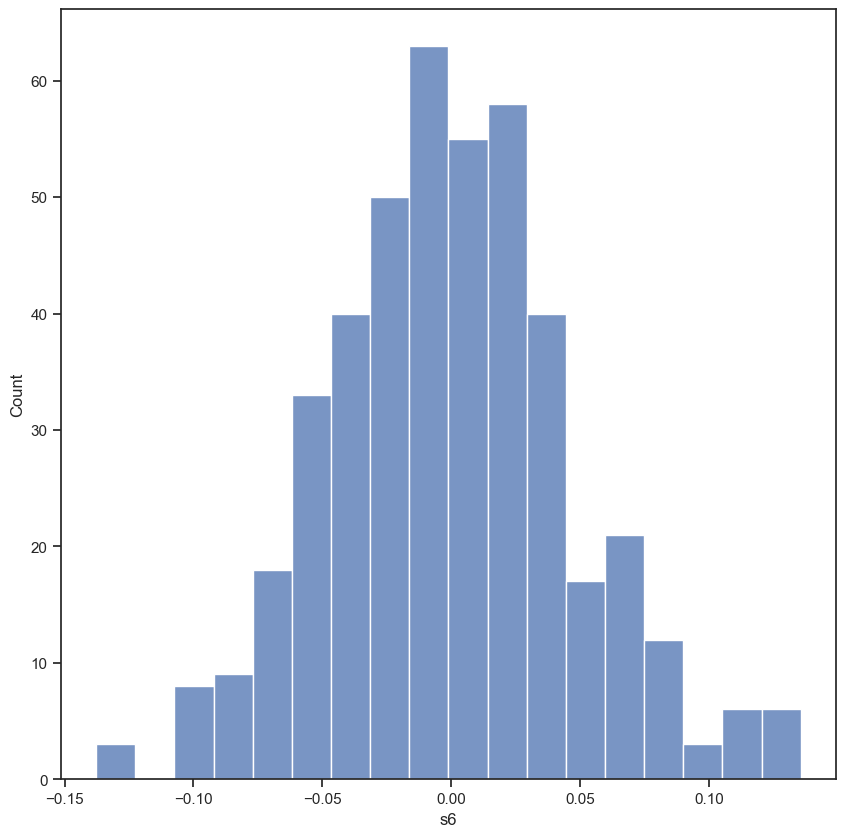

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data1['s6'])

### Jointplot

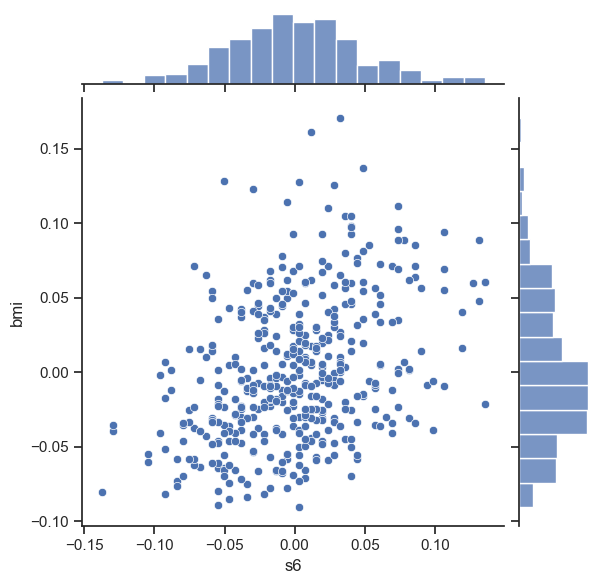

In [10]:
sns.jointplot(x='s6', y='bmi', data=data1)

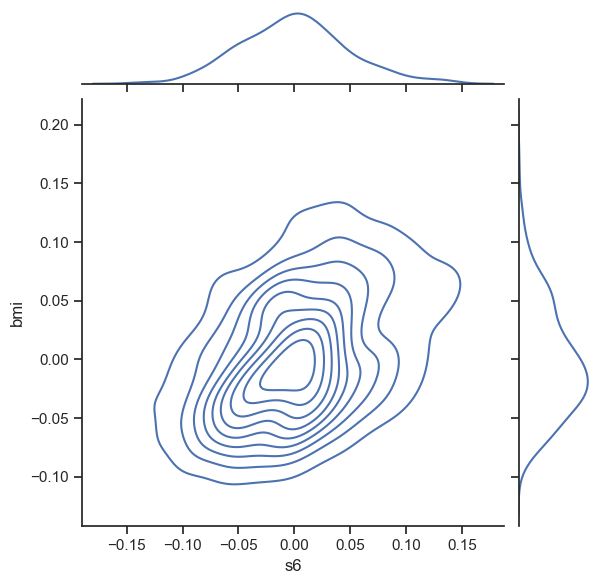

In [11]:
sns.jointplot(x='s6', y='bmi', data=data1, kind="kde")

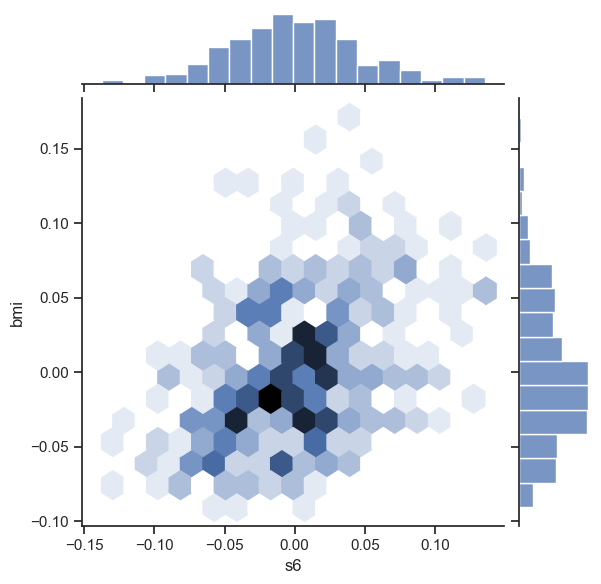

In [12]:
sns.jointplot(x='s6', y='bmi', data=data1, kind="hex")

### Парные диаграммы

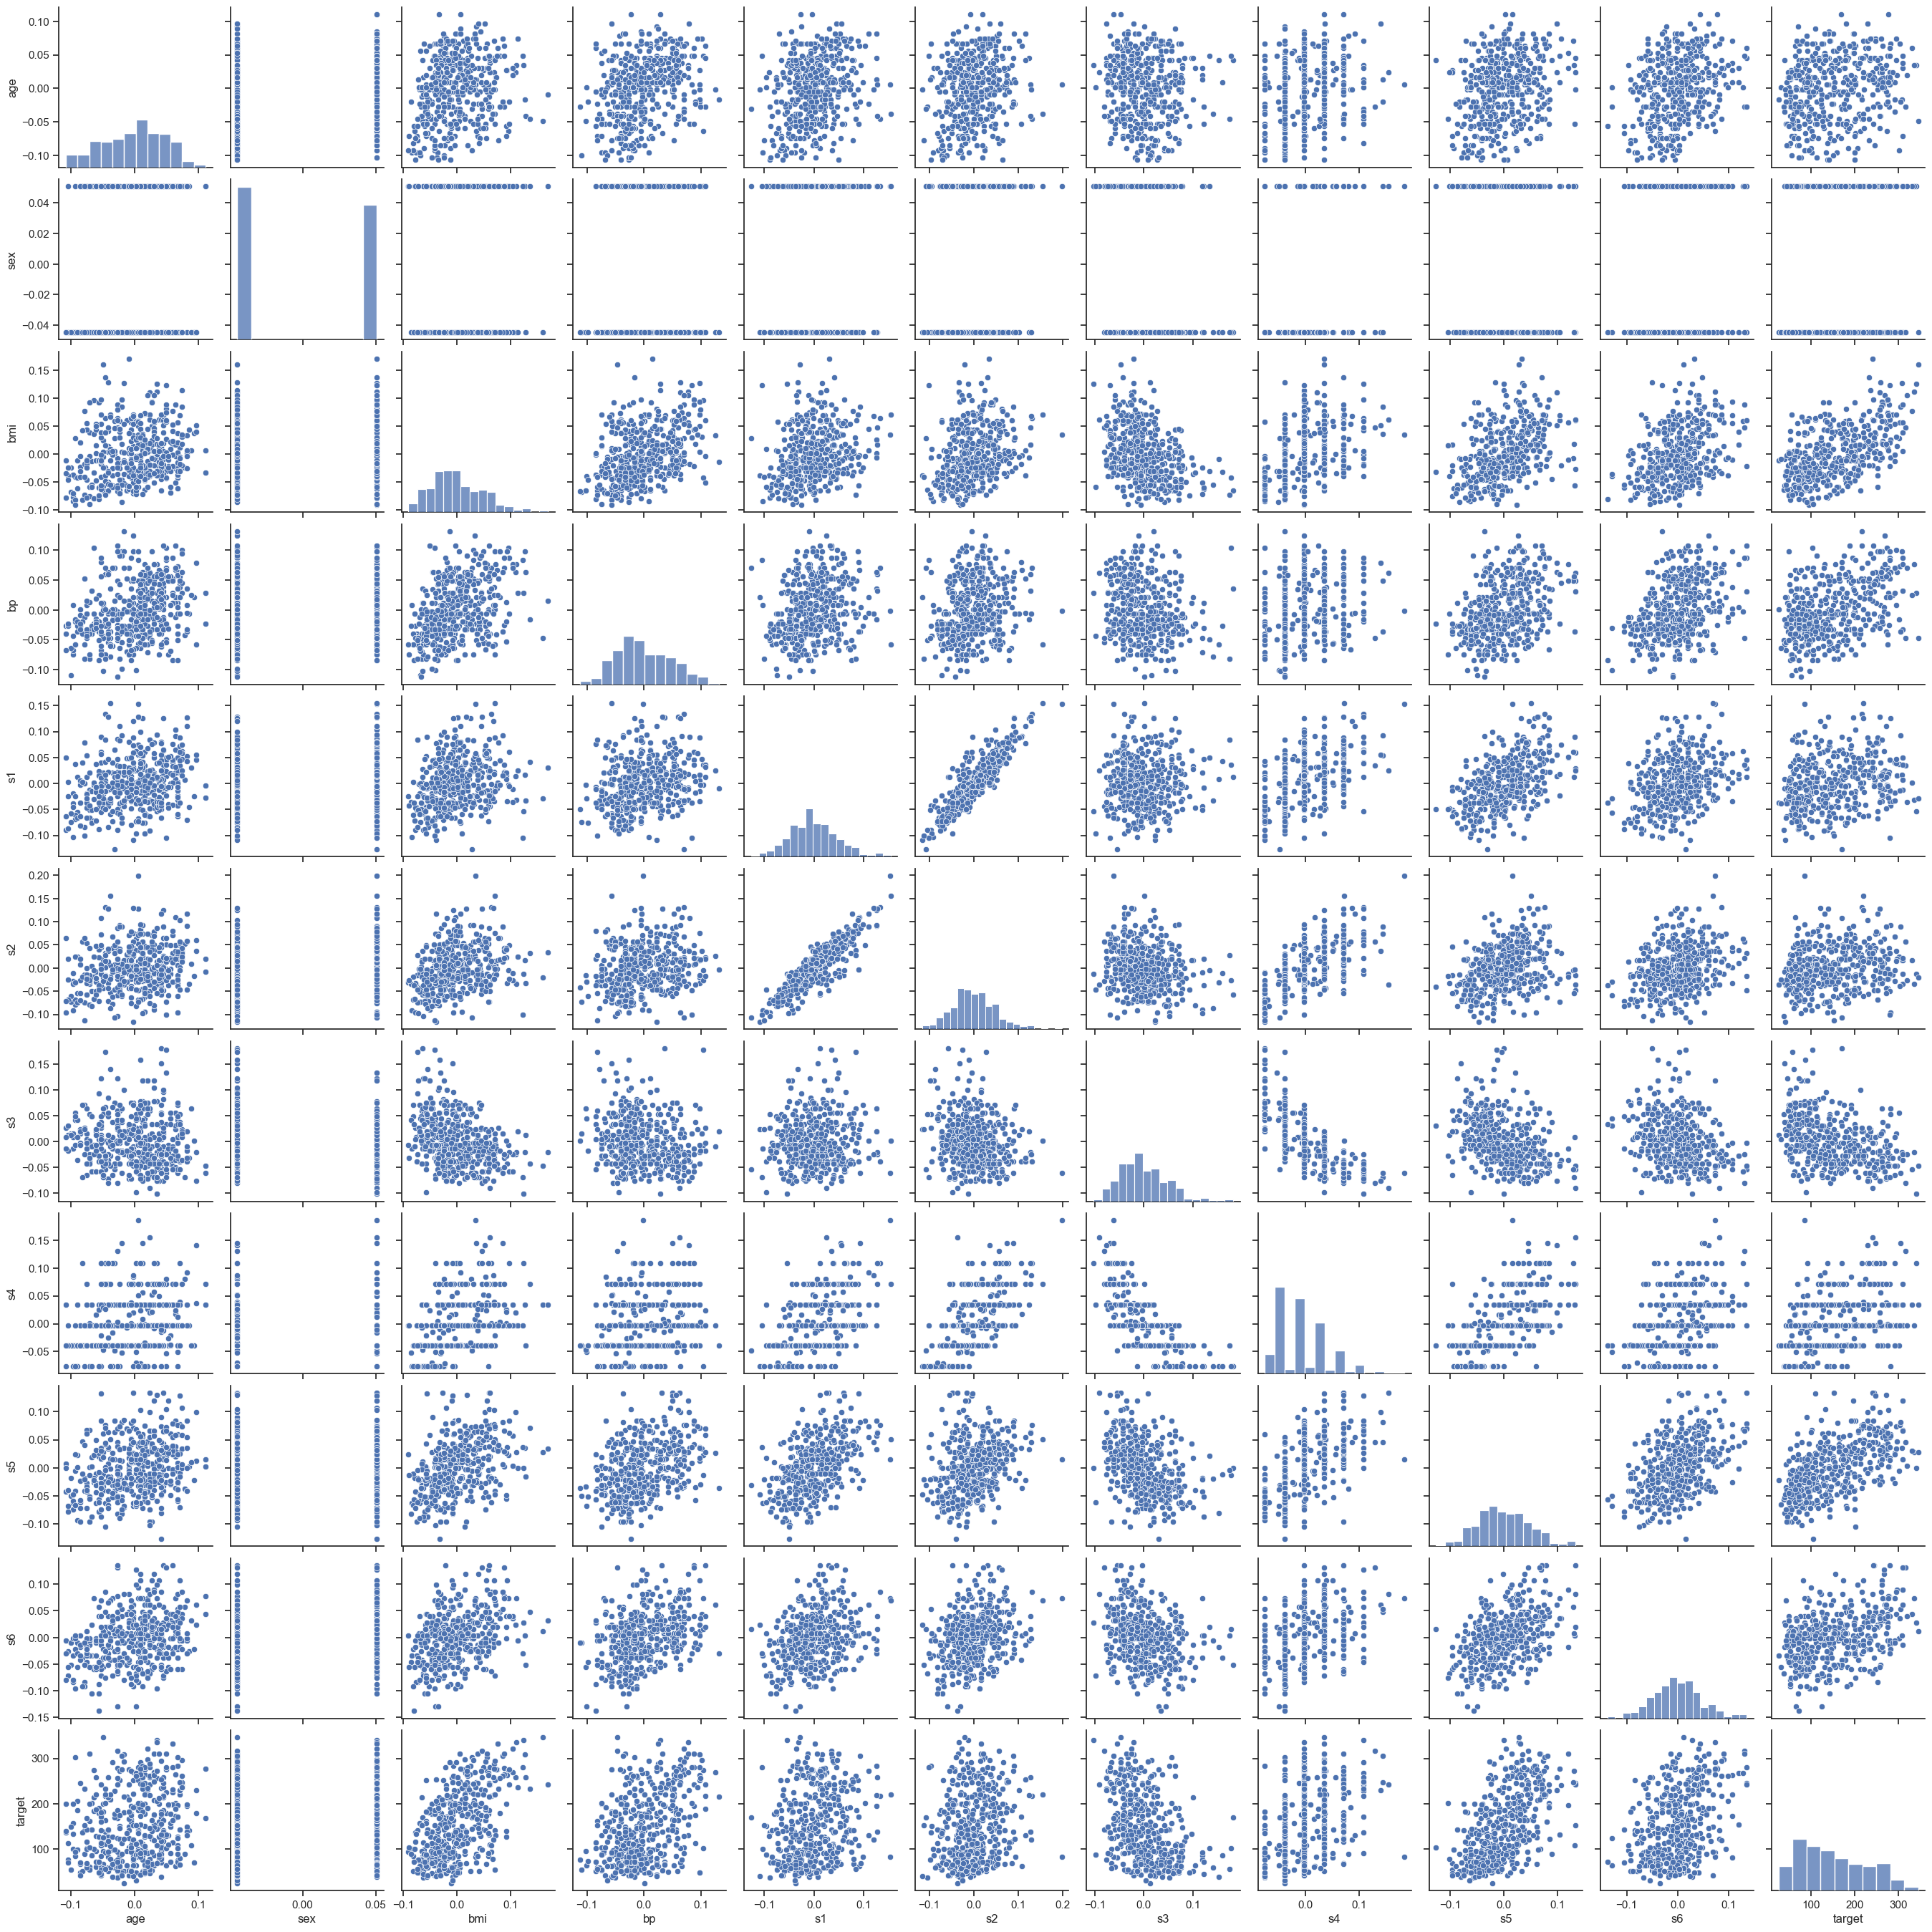

In [13]:
sns.pairplot(data1)

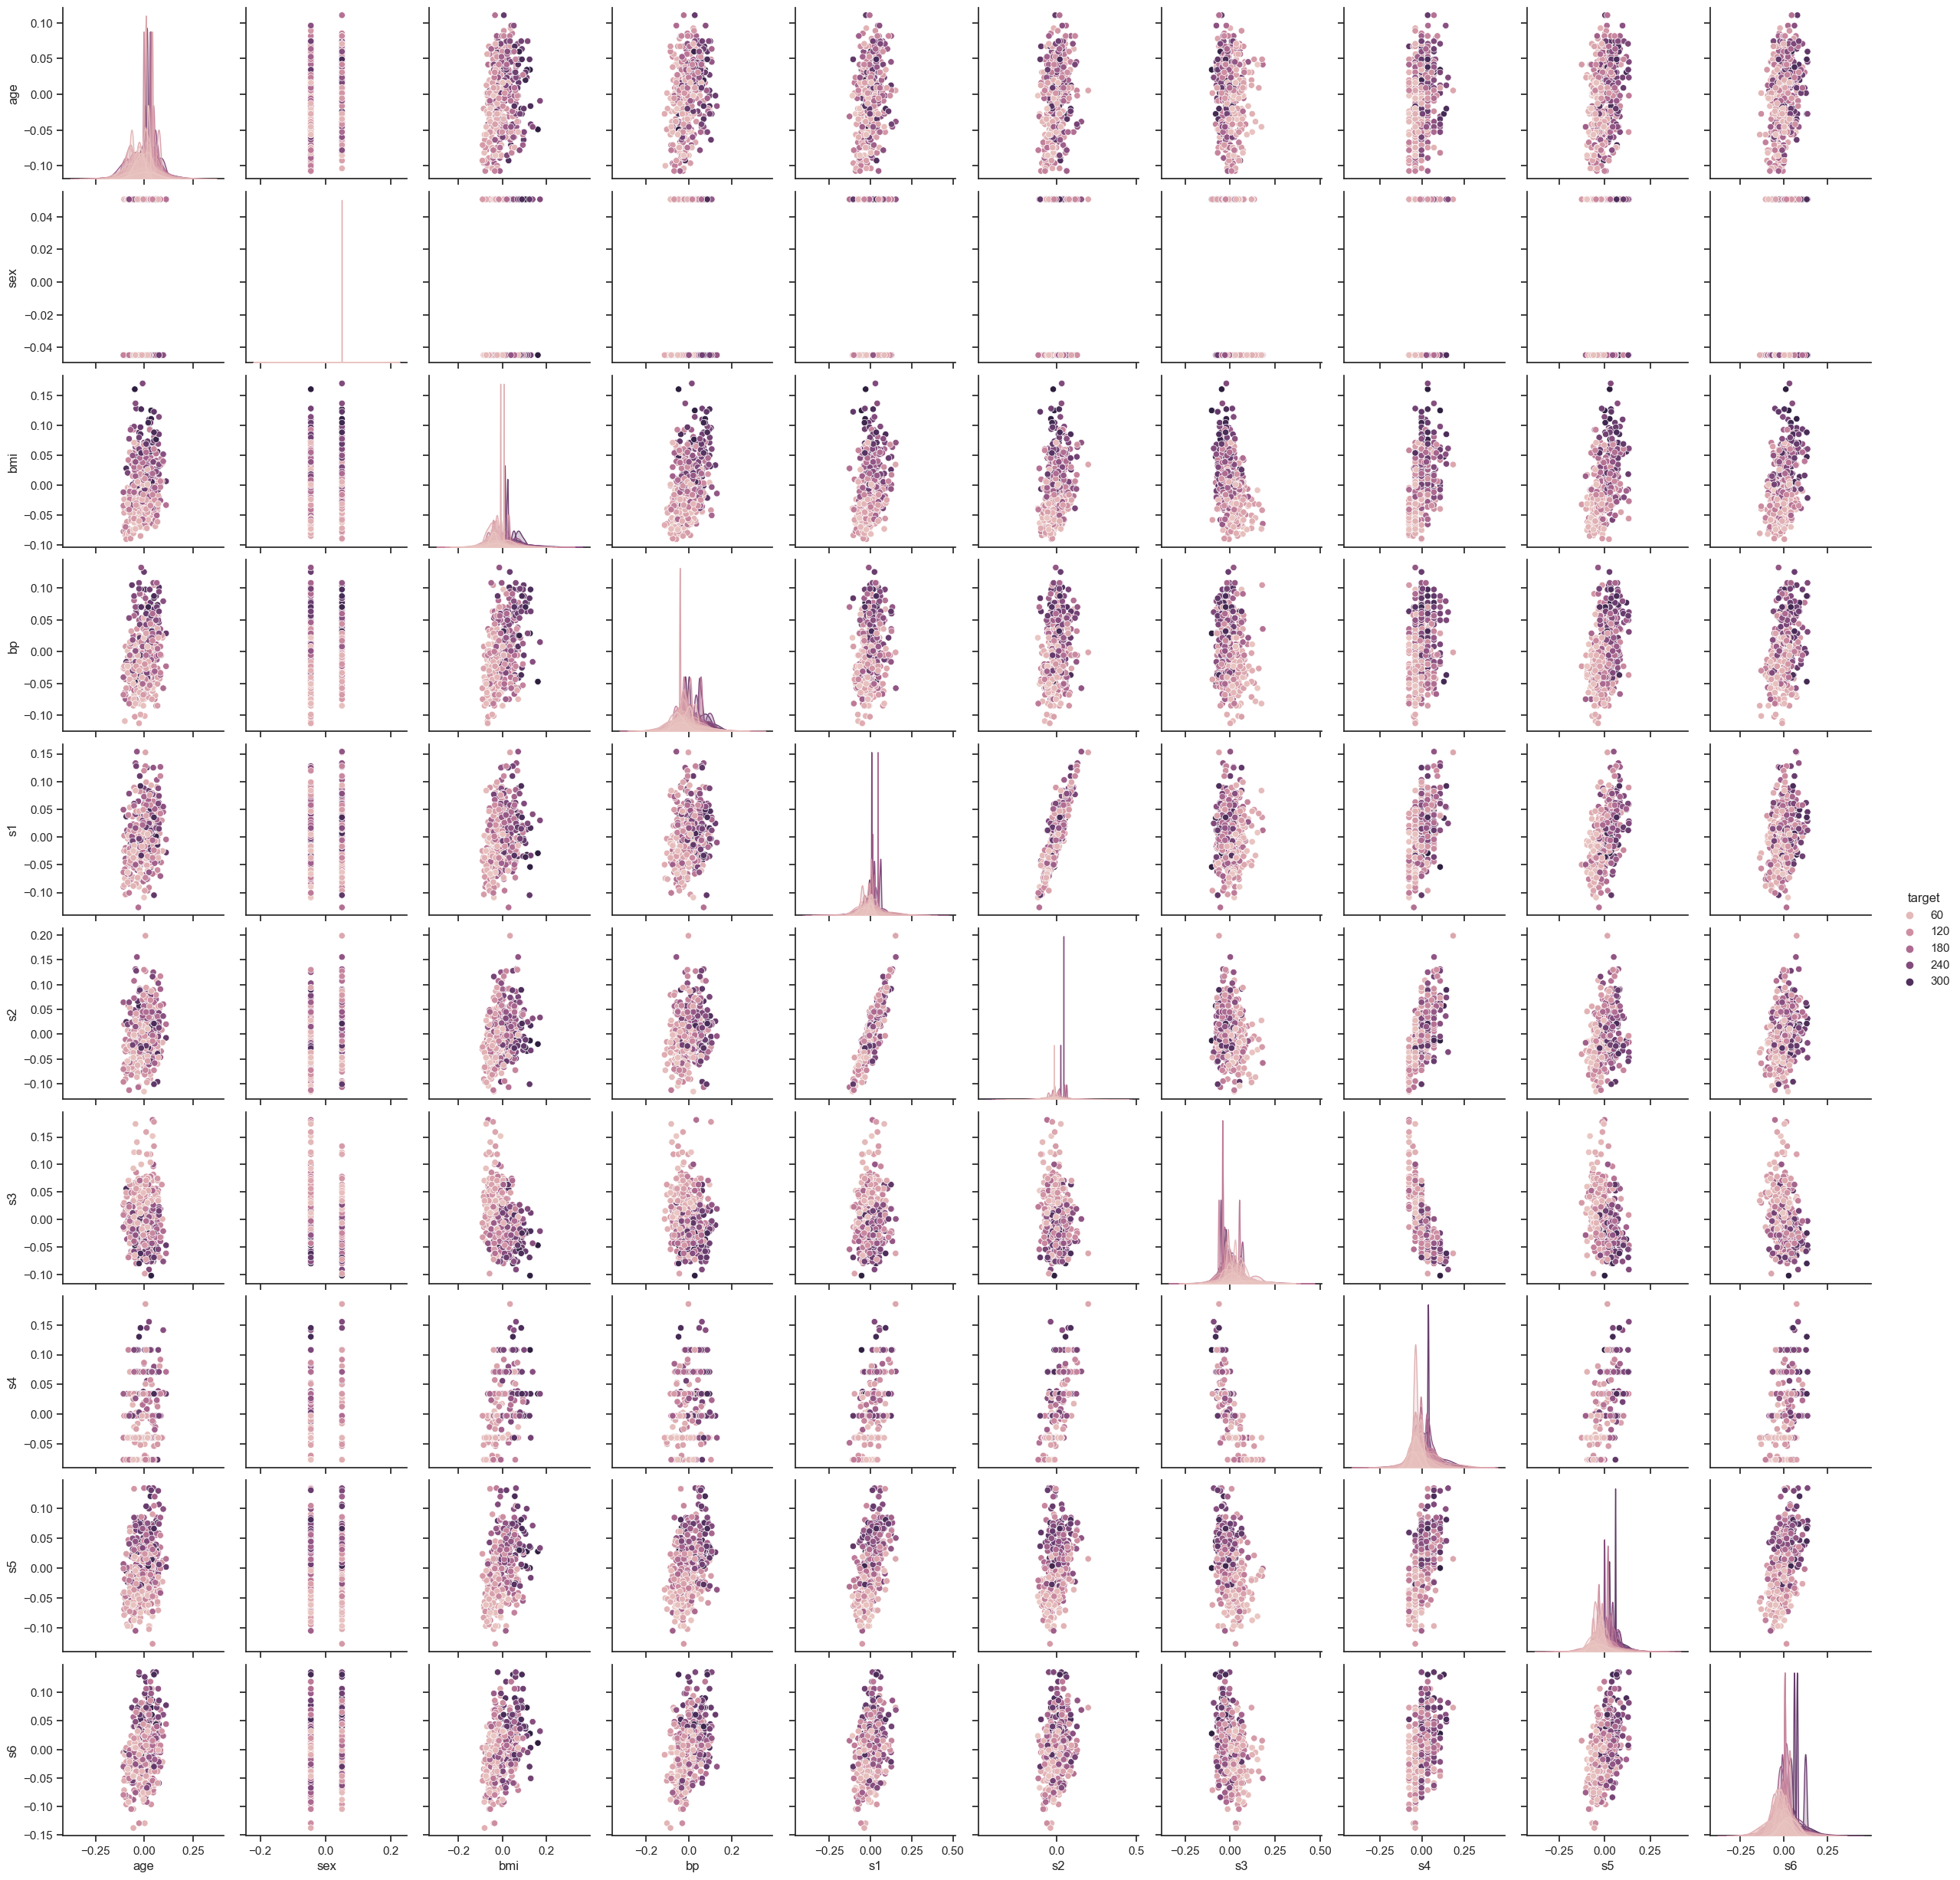

In [14]:
sns.pairplot(data1, hue="target")

### Ящик с усами

<AxesSubplot: xlabel='bp'>

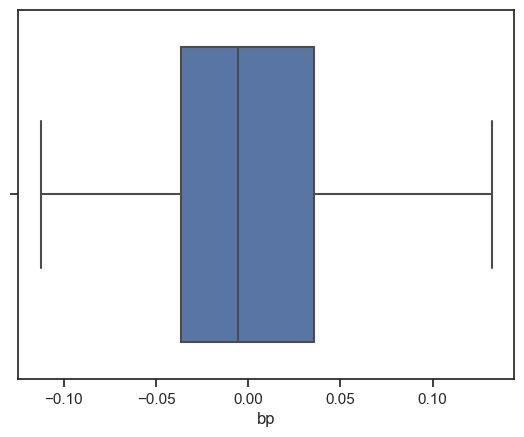

In [15]:
sns.boxplot(x=data1['bp'])

<AxesSubplot: ylabel='bp'>

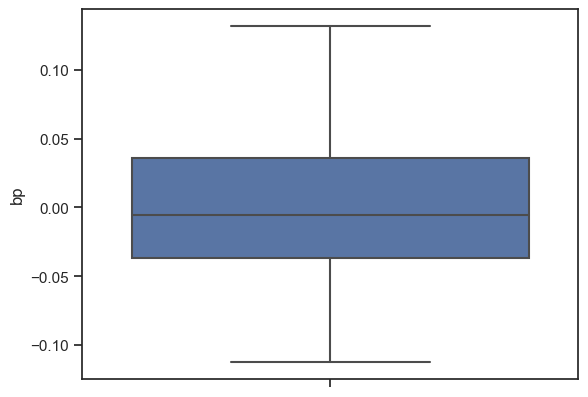

In [16]:
sns.boxplot(y=data1['bp'])

<AxesSubplot: xlabel='sex', ylabel='bp'>

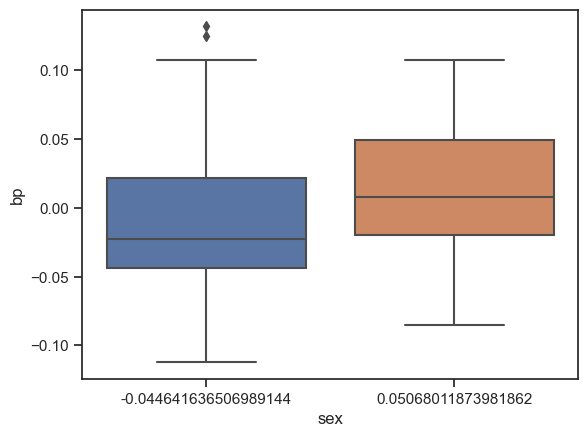

In [17]:
sns.boxplot(x='sex', y='bp', data=data1)

### Violin plot

<AxesSubplot: xlabel='s6'>

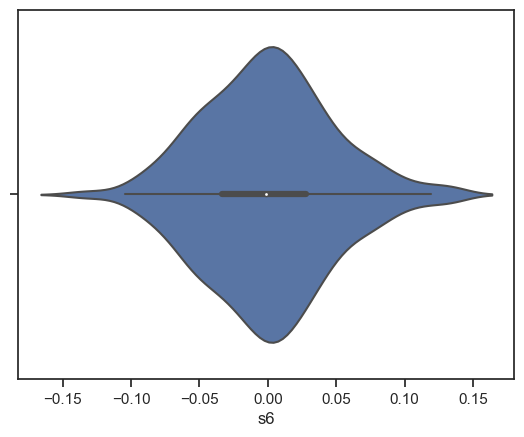

In [18]:
sns.violinplot(x=data1['s6'])

<AxesSubplot: xlabel='s6', ylabel='Count'>

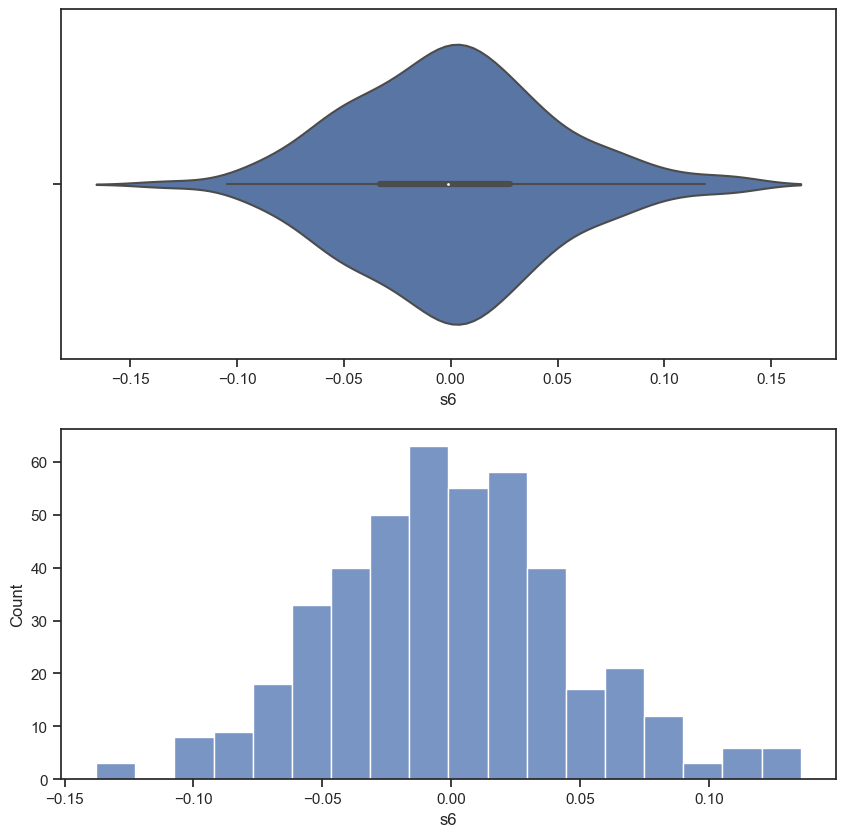

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data1['s6'])
sns.histplot(data1['s6'], ax=ax[1])

<AxesSubplot: xlabel='sex', ylabel='s6'>

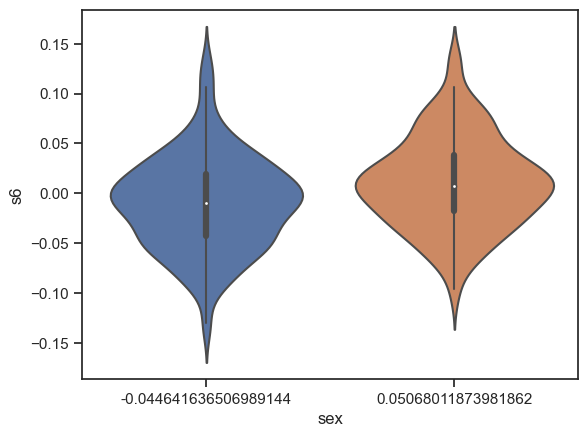

In [20]:
sns.violinplot(x='sex', y='s6', data=data1)

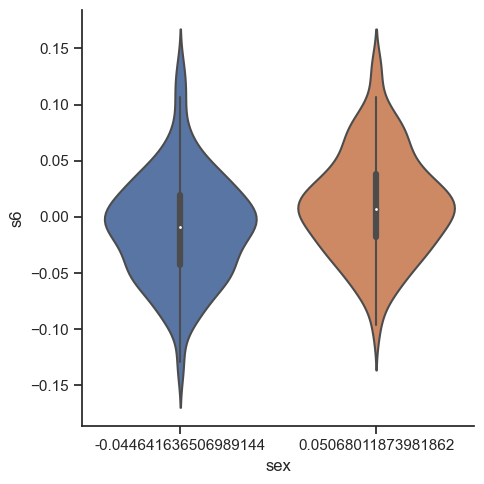

In [21]:
sns.catplot(y='s6', x='sex', data=data1, kind="violin", split=True)

## 4) Информация о корреляции признаков

In [22]:
data1.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

In [23]:
data1.corr(method='pearson')

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

In [24]:
data1.corr(method='kendall')

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.146580  0.136535  0.242111  0.182220  0.153612 -0.073846   
sex     0.146580  1.000000  0.080424  0.215733  0.022809  0.110208 -0.326188   
bmi     0.136535  0.080424  1.000000  0.281770  0.194171  0.198583 -0.249831   
bp      0.242111  0.215733  0.281770  1.000000  0.188067  0.140253 -0.131014   
s1      0.182220  0.022809  0.194171  0.188067  1.000000  0.717229  0.010695   
s2      0.153612  0.110208  0.198583  0.140253  0.717229  1.000000 -0.133332   
s3     -0.073846 -0.326188 -0.249831 -0.131014  0.010695 -0.133332  1.000000   
s4      0.160898  0.297335  0.335625  0.205948  0.393367  0.503579 -0.638633   
s5      0.180544  0.143172  0.344720  0.268863  0.356268  0.242250 -0.311775   
s6      0.201784  0.168199  0.266373  0.264566  0.227139  0.194082 -0.200545   
target  0.130709  0.030630  0.391195  0.289352  0.154016  0.129665 -0.278884   

              s4        s5        s6    target  
age     0.160898  0.180544  0.201784  0.130709  
sex     0.297335  0.143172  0.168199  0.030630  
bmi     0.335625  0.344720  0.266373  0.391195  
bp      0.205948  0.268863  0.264566  0.289352  
s1      0.393367  0.356268  0.227139  0.154016  
s2      0.503579  0.242250  0.194082  0.129665  
s3     -0.638633 -0.311775 -0.200545 -0.278884  
s4      1.000000  0.485410  0.307397  0.324734  
s5      0.485410  1.000000  0.316235  0.408988  
s6      0.307397  0.316235  1.000000  0.239051  
target  0.324734  0.408988  0.239051  1.000000

In [25]:
data1.corr(method='spearman')

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.177463  0.200554  0.350859  0.262524  0.221711 -0.106973   
sex     0.177463  1.000000  0.098079  0.261508  0.027790  0.134695 -0.394584   
bmi     0.200554  0.098079  1.000000  0.397985  0.287829  0.295494 -0.371172   
bp      0.350859  0.261508  0.397985  1.000000  0.275224  0.205638 -0.191033   
s1      0.262524  0.027790  0.287829  0.275224  1.000000  0.878793  0.015308   
s2      0.221711  0.134695  0.295494  0.205638  0.878793  1.000000 -0.197435   
s3     -0.106973 -0.394584 -0.371172 -0.191033  0.015308 -0.197435  1.000000   
s4      0.221017  0.337524  0.459068  0.280799  0.520674  0.652283 -0.789694   
s5      0.265176  0.174625  0.491609  0.396071  0.512864  0.349947 -0.450420   
s6      0.296235  0.203277  0.384664  0.381219  0.332173  0.286483 -0.290863   
target  0.197822  0.037401  0.561382  0.416241  0.232429  0.195834 -0.410022   

              s4        s5        s6    target  
age     0.221017  0.265176  0.296235  0.197822  
sex     0.337524  0.174625  0.203277  0.037401  
bmi     0.459068  0.491609  0.384664  0.561382  
bp      0.280799  0.396071  0.381219  0.416241  
s1      0.520674  0.512864  0.332173  0.232429  
s2      0.652283  0.349947  0.286483  0.195834  
s3     -0.789694 -0.450420 -0.290863 -0.410022  
s4      1.000000  0.640390  0.413700  0.448931  
s5      0.640390  1.000000  0.453023  0.589416  
s6      0.413700  0.453023  1.000000  0.350792  
target  0.448931  0.589416  0.350792  1.000000

<AxesSubplot: >

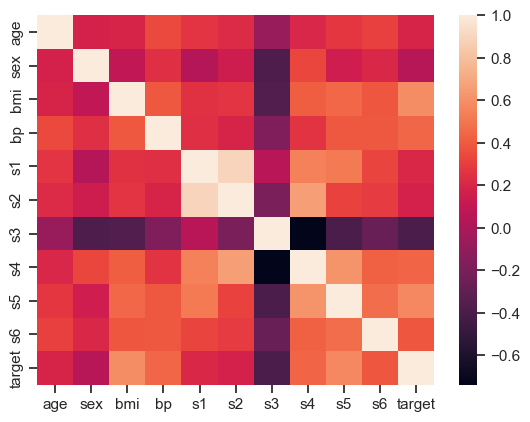

In [26]:
sns.heatmap(data1.corr())

<AxesSubplot: >

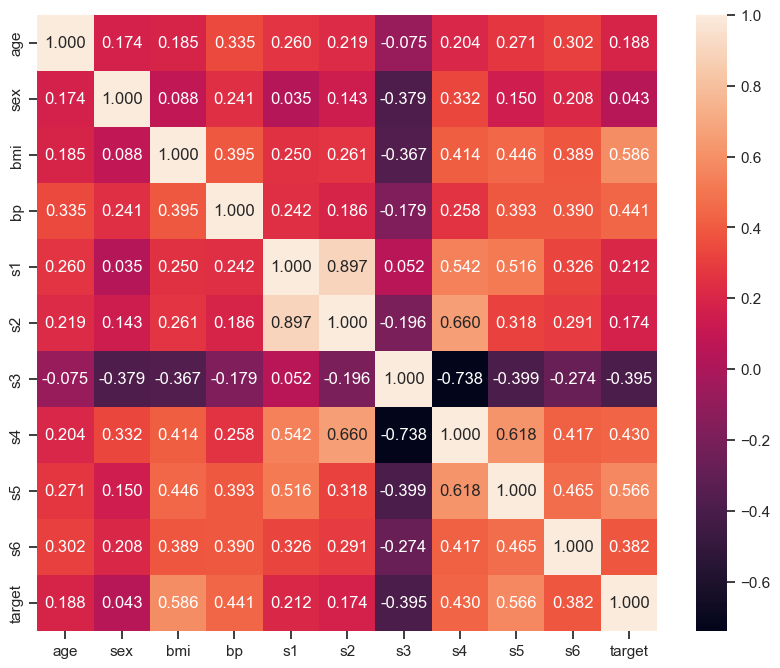

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data1.corr(), annot=True, fmt='.3f')

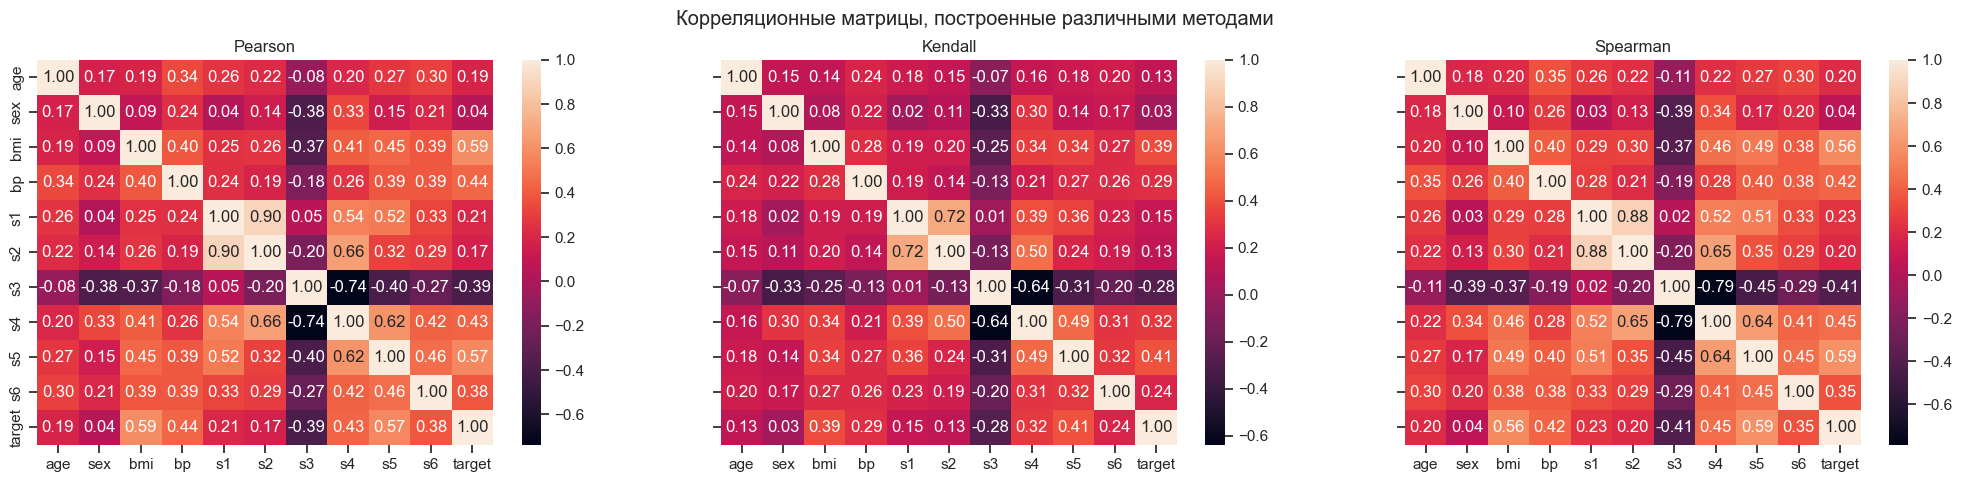

In [28]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(25,5))
sns.heatmap(data1.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')